# Data Loading
- Use function: easyEEG.io.load_epochs(__file__)
- File can be a string or a list of strings
 - e.g.1 'data/xxxx.h5'
 - e.g.2 ['data/xxxx-epo.fif','data/zzzz-epo.fif']
- Supported file kinds
 - MNE fif: 'YOUR_FILE_NAME-epo.fif'
 - easyeeg H5: 'YOUR_FILE_NAME.h5'
 - pickle binarys: 'YOUR_FILE_NAME.pickle' or 'YOUR_FILE_NAME.p'
 - EEGLAB mat file: 'YOUR_FILE_NAME.mat'
- Standard Dataset is stored in our server at /Share/ directory
 - or download from google drive: https://drive.google.com/file/d/1-BUUpUOOVfUDgOHMsFfi7_0UMB2QaUll/view?usp=sharing

In [2]:
epoch = easyEEG.io.load_epochs(path+'all_localizors.h5')

reading 1
reading 10
reading 11
reading 12
reading 13
reading 14
reading 15
reading 16
reading 17
reading 18
reading 19
reading 2
reading 20
reading 21
reading 22
reading 23
reading 24
reading 25
reading 26
reading 27
reading 28
reading 29
reading 3
reading 30
reading 31
reading 32
reading 33
reading 34
reading 35
reading 36
reading 37
reading 38
reading 39
reading 4
reading 40
reading 41
reading 42
reading 43
reading 44
reading 45
reading 46
reading 47
reading 48
reading 49
reading 5
reading 50
reading 51
reading 52
reading 53
reading 54
reading 55
reading 56
reading 57
reading 58
reading 59
reading 6
reading 60
reading 61
reading 62
reading 63
reading 64
reading 65
reading 66
reading 67
reading 68
reading 69
reading 7
reading 8
reading 9
Concatenated.


# Analysis
## Data Extraction
- Define a short string or a dictionary for the data your want
 - String: "CONDITION @ CHANNEL @ TIMEPOINTS"
      - CONDITION: the condition you define at preprocessing
      - CHANNEL: 1. single channel,like Cz 2.average of multiple channels, Cz+Pz+Fz 3. all channles, each
      - TIMEPOINTS: 1.single time point,100 2.range of time, 0~400
  - Dictionary:{'conditions':'CONDITION','channel':'CHANNEL','timepoints': 'TIMEPOINTS'}
      - same rule applies
- Call epoch.extract(DEFINED_SRIPT) to extract data

## Algorithm
- Call different functions to apply different analysis algorithms
 - ERP
     - classic analysis, show erp for one or more channels
 - topo_ERPs
     - plot all channels erp according to sensors relative layout
 - ERPs
     - plot all channels erp in one plot
 - GFP
     - global field power, reflect power distribution
 - topography
     - possible source information
 - Spectrum
     - frequency domain analysis
 - Time_frequency
     - frequency domain analysis on temporal domain
 - clustering
     - K-means differtiate different clusters
 
## Plot
- Call plot() after applying algorithm

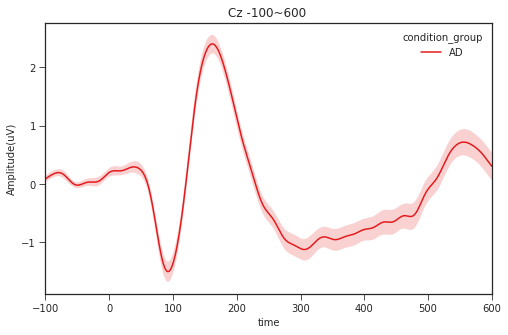

<Figure size 432x288 with 0 Axes>

In [3]:
collection_script = 'AD @ Cz @ -100~600'
ERP = epoch.extract(collection_script).ERP()
ERP.default_plot_params['style']='ticks'
ERP.plot()

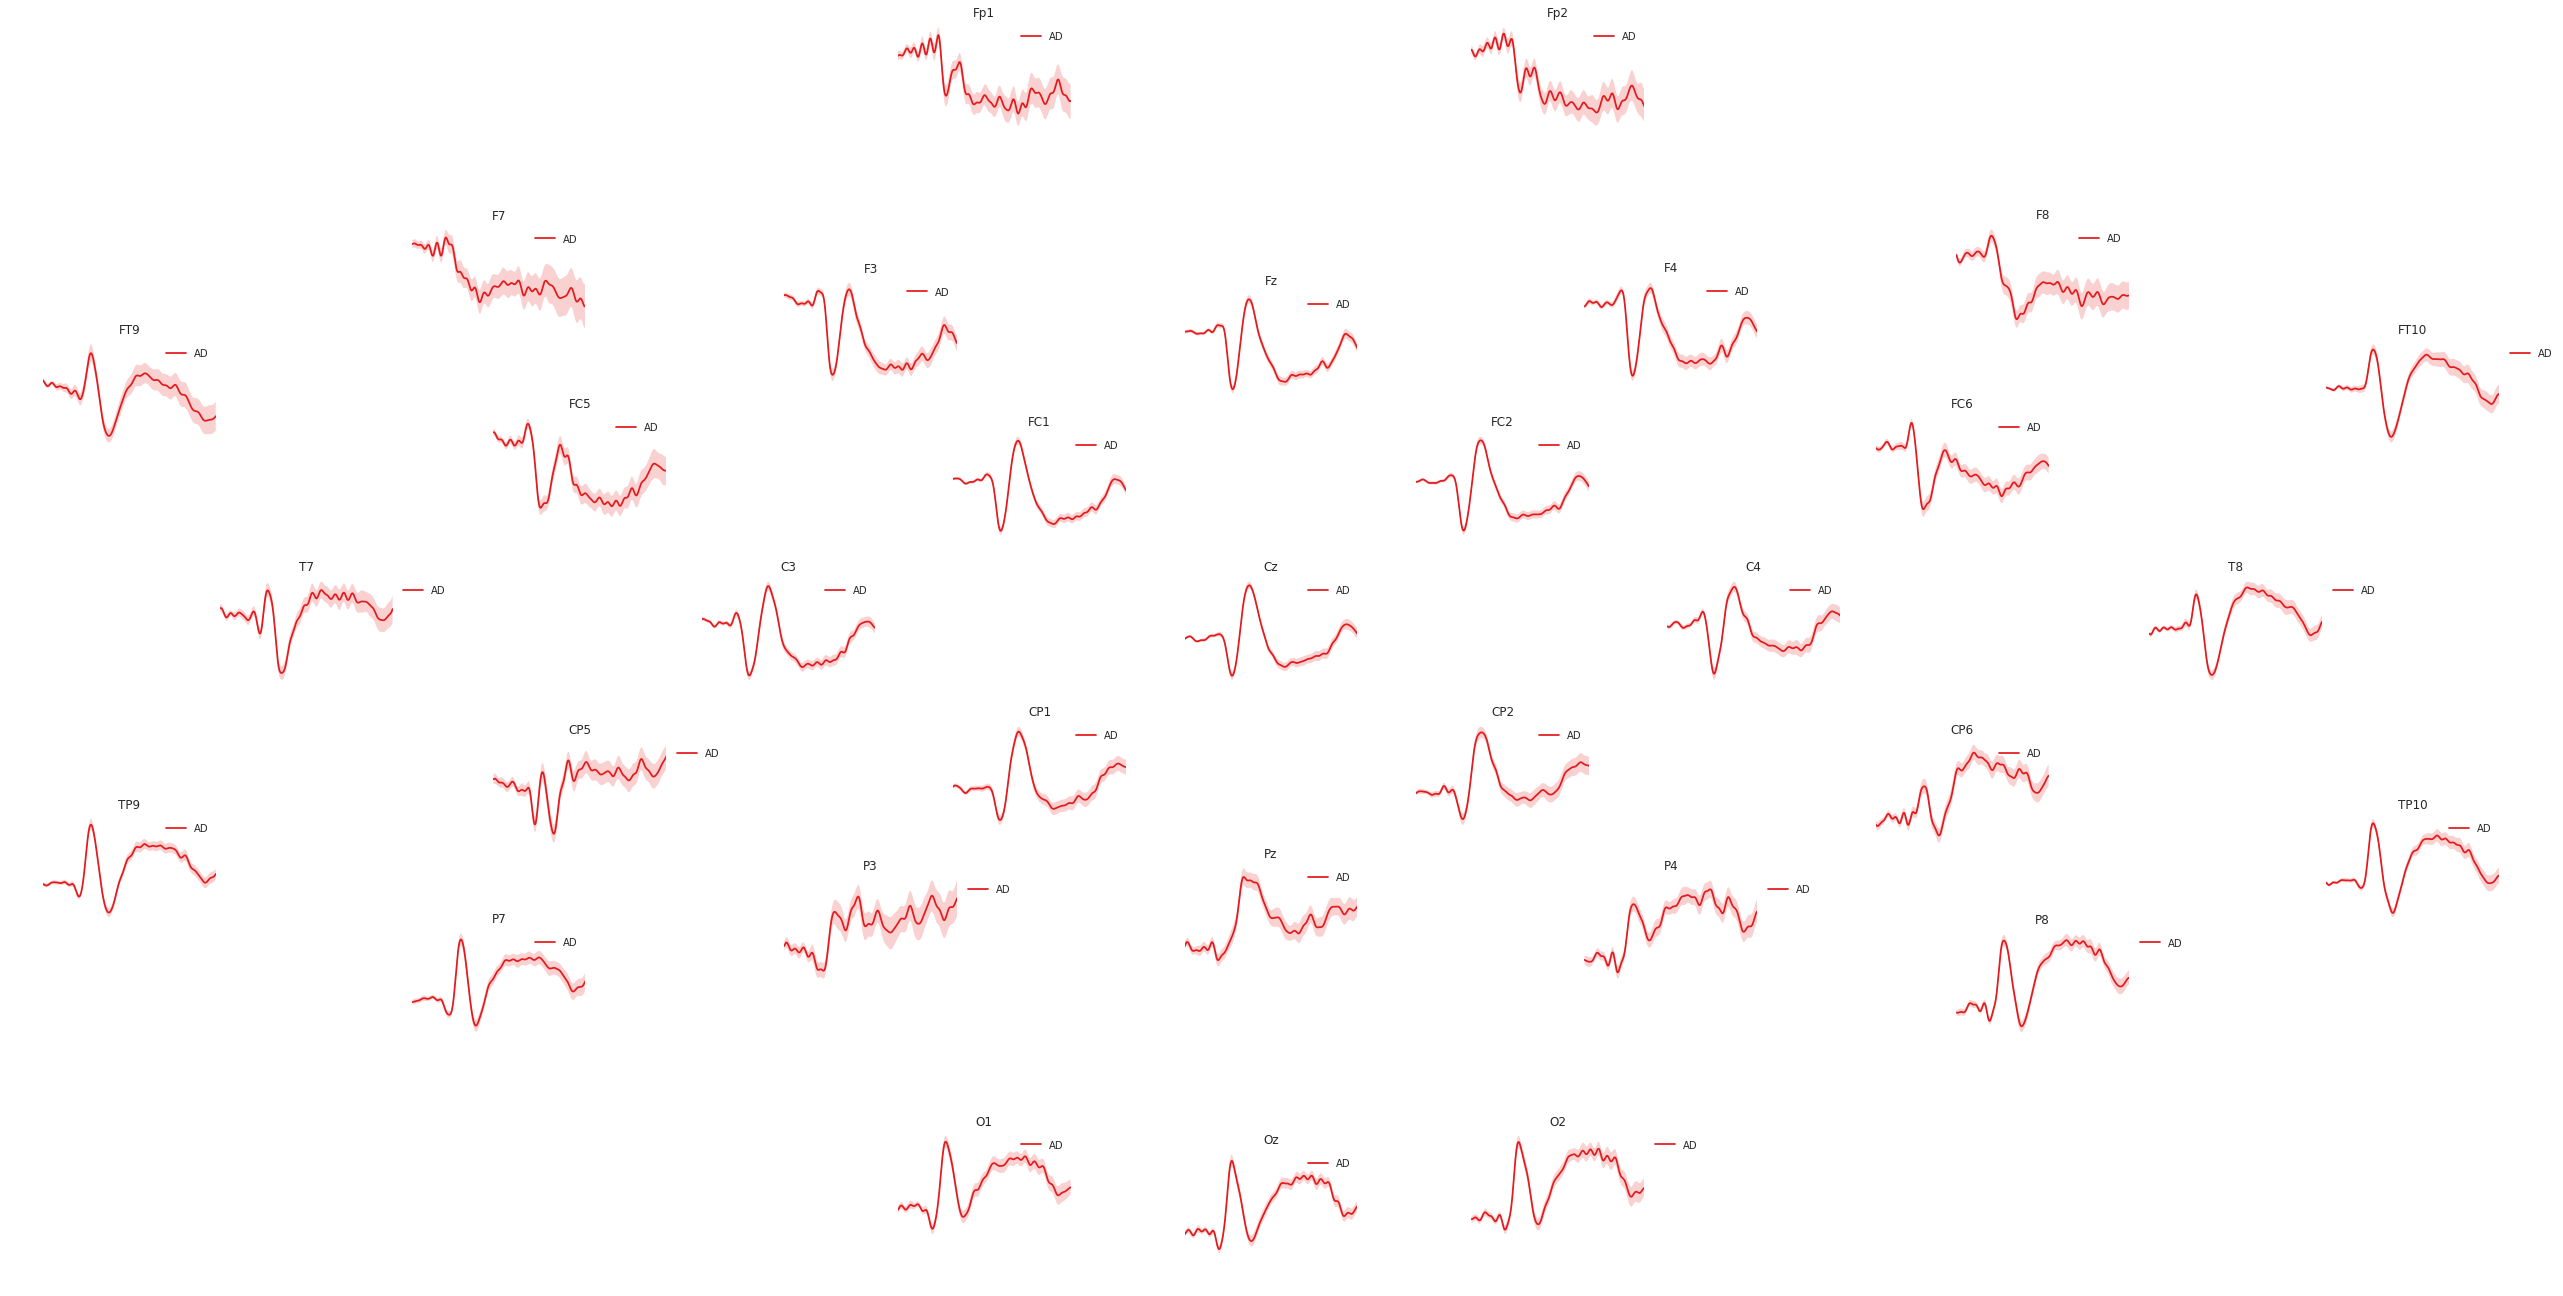

<Figure size 432x288 with 0 Axes>

In [4]:
collection_script = 'AD @ each @ -100~600'
topo_ERPs = epoch.extract(collection_script).topo_ERPs()
topo_ERPs.default_plot_params['style']='ticks'
topo_ERPs.plot()

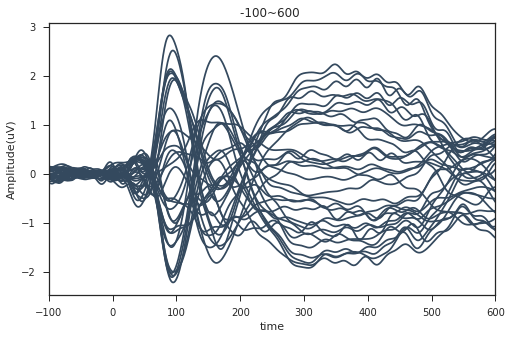

<Figure size 432x288 with 0 Axes>

In [5]:
collection_script = 'AD @ each @ -100~600'
ERPs = epoch.extract(collection_script).ERPs()
ERPs.default_plot_params['style']='ticks'
ERPs.plot()

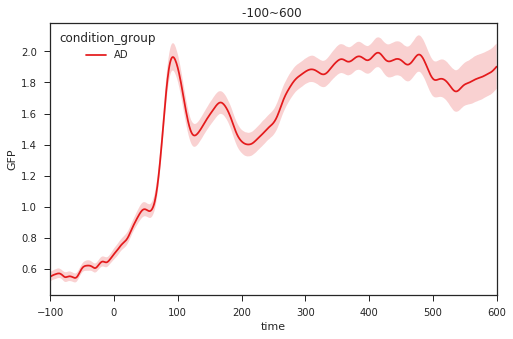

<Figure size 432x288 with 0 Axes>

In [6]:
collection_script = 'AD @ @ -100~600'
GFP = epoch.extract(collection_script).GFP()
GFP.default_plot_params['style']='ticks'
GFP.plot()

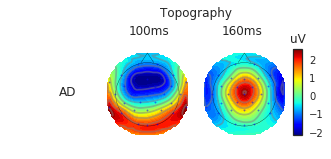

<Figure size 432x288 with 0 Axes>

In [7]:
collection_script = {'conditions':'AD','channel':'each','timepoints': '100,160'}
topography = epoch.extract(collection_script).topography( )
topography.plot()

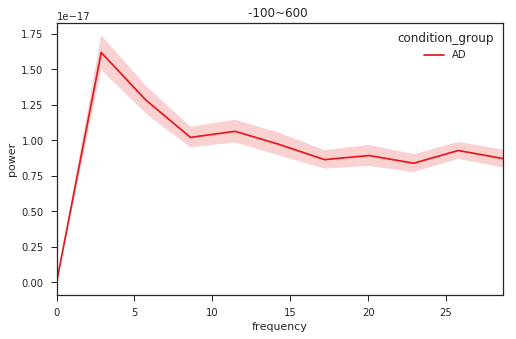

<Figure size 432x288 with 0 Axes>

In [8]:
collection_script = 'AD @ @ -100~600'
Spectrum = epoch.extract(collection_script).Spectrum()
Spectrum.default_plot_params['style']='ticks'
Spectrum.plot()

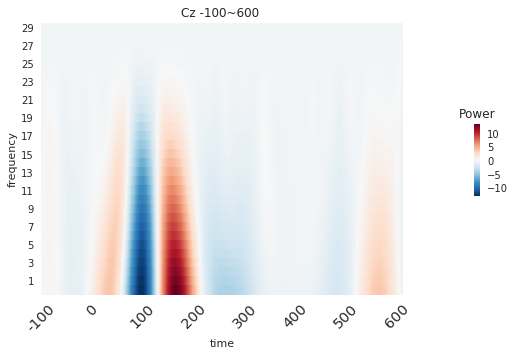

<Figure size 432x288 with 0 Axes>

In [9]:
collection_script = 'AD @ Cz @ -100~600'
Time_frequency = epoch.extract(collection_script).Time_frequency()
Time_frequency.plot()


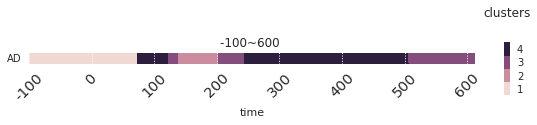

<Figure size 432x288 with 0 Axes>

In [10]:
collection_script = {'conditions':'AD','channel':'each','timepoints': '-100~600'}
clustering = epoch.extract(collection_script).clustering(n_clusters=4)
clustering.plot()


## Statatistics
- Refer to our method paper for more information
 - Group-Level Multivariate Analysis in EasyEEG Toolbox: Examining the Temporal Dynamics Using Topographic Responses
 - https://doi.org/10.3389/fnins.2018.00468